In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import numpy as np

In [2]:
# sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('pandas_data/gdp.csv', skiprows=4)
df.drop(['Indicator Name', 'Indicator Code', 'Unnamed: 63'], axis=1, inplace=True)

In [4]:
df.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.519748,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858713,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.349994,3.706881,2.545405,1.417526,1.001988,1.770000,2.230000,3.350000,3.836620,4.004413
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345


In [5]:
inverted_df = df.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Year", 
        value_name="Value")

In [6]:
inverted_df.shape

(15576, 4)

In [7]:
inverted_df.isna().sum()

Country Name       0
Country Code       0
Year               0
Value           3914
dtype: int64

In [8]:
inverted_df['Value'] = inverted_df['Value'].fillna(0)

In [9]:
inverted_df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [10]:
inverted_df.columns

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [11]:
inverted_df['Year'] = inverted_df['Year'].apply(lambda x: int(x))

In [12]:
inverted_df

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,0.000000
1,Afghanistan,AFG,1960,0.000000
2,Angola,AGO,1960,0.000000
3,Albania,ALB,1960,0.000000
4,Andorra,AND,1960,0.000000
...,...,...,...,...
15571,Kosovo,XKX,2018,4.145372
15572,"Yemen, Rep.",YEM,2018,-2.701475
15573,South Africa,ZAF,2018,0.787056
15574,Zambia,ZMB,2018,3.794901


In [13]:
inverted_df['Year'].min()

1960

In [14]:
inverted_df['Year'].max()

2018

In [15]:
current_year = 2008
dff = inverted_df[inverted_df['Year'].eq(current_year)].sort_values(by='Value', ascending=False).head(10)
dff

,Country Name,Country Code,Year,Value
12849,Nauru,NRU,2008,34.419291
12758,Equatorial Guinea,GNQ,2008,17.799109
12870,Qatar,QAT,2008,17.663556
12905,Turkmenistan,TKM,2008,14.700000
12873,Rwanda,RWA,2008,11.167253
12674,Angola,AGO,2008,11.166138
12742,Ethiopia,ETH,2008,10.788522
12685,Azerbaijan,AZE,2008,10.591437
12830,Myanmar,MMR,2008,10.255305
12695,Belarus,BLR,2008,10.199999


<BarContainer object of 10 artists>

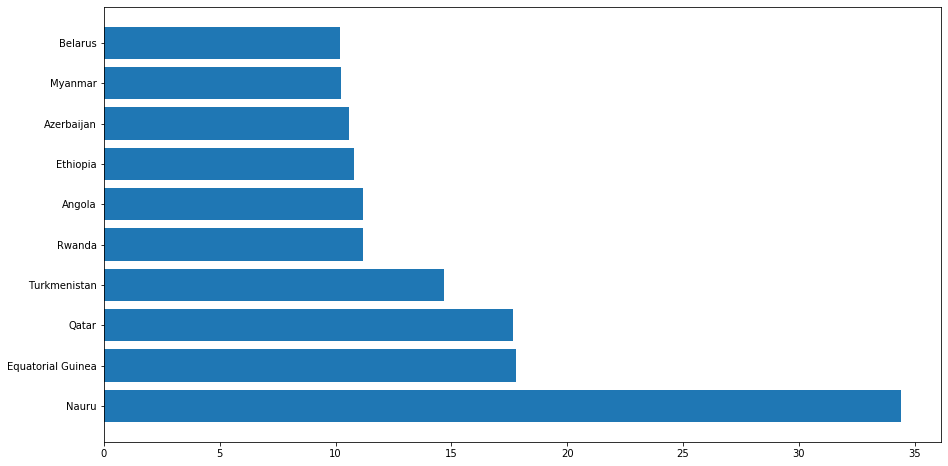

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country Name'], dff['Value'])

In [17]:
colors = {}
for country in df['Country Name'].unique():
    x, y, z = np.random.randint(low=50, high=200, size=3)
    color = '#%02x%02x%02x' % (x, y, z)
    colors[country] = color

In [18]:
colors

{'Aruba': '#83bd56',
 'Afghanistan': '#8b3bc4',
 'Angola': '#924985',
 'Albania': '#a0a166',
 'Andorra': '#bb999e',
 'Arab World': '#5e4ebb',
 'United Arab Emirates': '#9bbc3a',
 'Argentina': '#ba776f',
 'Armenia': '#934fa6',
 'American Samoa': '#9b7876',
 'Antigua and Barbuda': '#be3646',
 'Australia': '#c59fbe',
 'Austria': '#4ba144',
 'Azerbaijan': '#603349',
 'Burundi': '#7f583a',
 'Belgium': '#9da263',
 'Benin': '#4d3ea5',
 'Burkina Faso': '#56717c',
 'Bangladesh': '#83b4c6',
 'Bulgaria': '#9e5ec3',
 'Bahrain': '#3255b6',
 'Bahamas, The': '#796d47',
 'Bosnia and Herzegovina': '#45709e',
 'Belarus': '#86b3c7',
 'Belize': '#80365b',
 'Bermuda': '#3f51ac',
 'Bolivia': '#bfa998',
 'Brazil': '#3da5c3',
 'Barbados': '#79b576',
 'Brunei Darussalam': '#86a980',
 'Bhutan': '#968899',
 'Botswana': '#8e6740',
 'Central African Republic': '#373c5f',
 'Canada': '#c68062',
 'Central Europe and the Baltics': '#a6c078',
 'Switzerland': '#41a393',
 'Channel Islands': '#a2c6bd',
 'Chile': '#6d944d'

Text(1, 0.4, '2008')

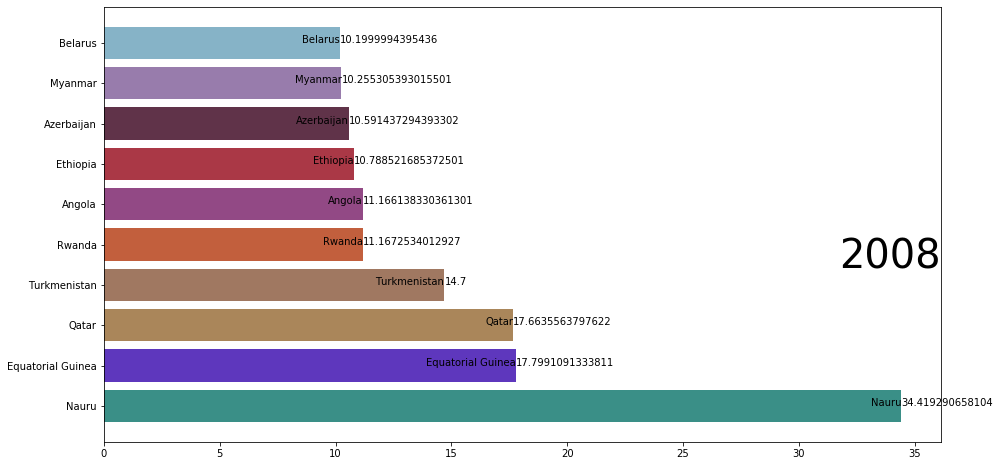

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
ax.barh(dff['Country Name'], dff['Value'], color=[colors[x] for x in dff['Country Name']])
for i, (value, name) in enumerate(zip(dff['Value'], dff['Country Name'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i,     value,           ha='left') 
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=40, ha='right')

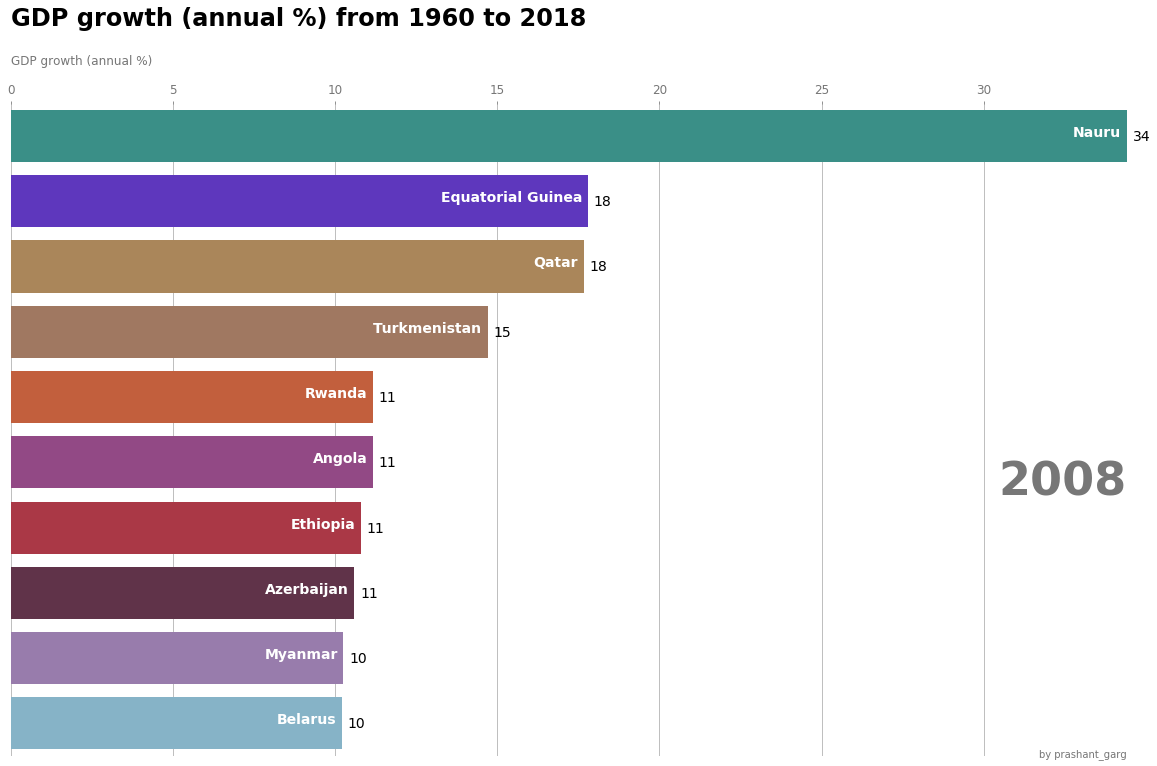

In [44]:
fig, ax = plt.subplots(figsize=(20, 12))
def draw_barchart(year):
    dff = inverted_df[inverted_df['Year'].eq(year)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country Name'], dff['Value'], color=[colors[x] for x in dff['Country Name']])
    dx = dff['Value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Value'], dff['Country Name'])):
        ax.text(value-dx, i,     name,           size=14, color='#FFFFFF', weight=600, ha='right', va='baseline')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'GDP growth (annual %)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'GDP growth (annual %) from 1960 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by prashant_garg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2008)

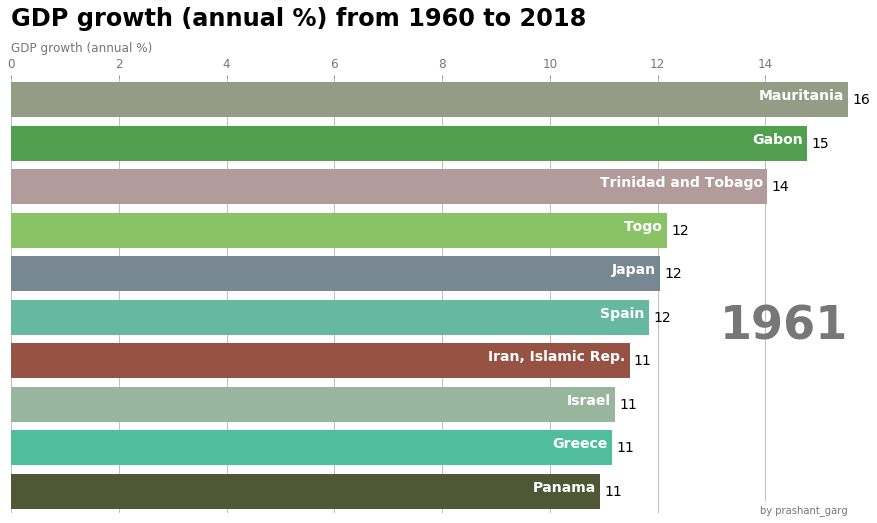

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2018), interval=2000)
HTML(animator.to_jshtml()) 